# Character Impact Project (Part 3) - Facial Detection
## OpenCV
### Alden Chico

---

## Premise

When Apple announced the iPhone X back in 2017, Apple fans from around the world were amazed by the absence of the phone's home button. Instead, the iPhone X uses the frontal facing camera and FaceID to grant users access to their phones via the iPhone X's front facing camera. FaceID was revolutionary at the time and many smartphone manufacturers such as Samsung and OnePlus have followed in Apple's footsteps and implemented facial recognition unlock their newest versions of smartphones.

But here's the thing. What if I told you that you can implement your own version of FaceID to any picture, video feed, or webcam that you have access to? Yes, open source facial detection and recognition libraries exist today that are robust and allow any average Joe to code up a facial recognizer from the comfort of his own laptop.

<figure>
<img src="https://m.media-amazon.com/images/M/MV5BMTc3NTY5ODE4OF5BMl5BanBnXkFtZTgwMjU1MjY1MjE@._V1_.jpg" alt="Michael Scott Disguise" class="center">
<figcaption><center><b>Facial Detection Will Find This Mystery Man...</b></center></figcaption>
</figure> 

To demonstrate how facial recognition works, I'll split the discussion into its two key steps: facial detection and facial recognition. Facial detection is how a computer software can detect a face in a picture using pre-defined patterns. Facial recognition is how the computer software identifies features unique to the detected face in order to specify who that person is.

In this post, we'll focus on facial detection using the open source OpenCV library. First, we'll discuss the basic theory behind the Haar classifier; a pattern recognition tool that detects faces in a picture. After that, we'll implement the Haar classifier in code using OpenCV. Next, we'll discuss the theory behind the Local Binary Pattern (LBP) classifier and implement that using OpenCV as well. Lastly, we'll run the LBP classifier to detect faces in a video and discuss the idea of hyperparameters and its affect on facial detection. Lots to do in this blog post, so let's get started!

---

## Haar Face Classifier

The Haar Classifier was developed by Paul Viola and Michael Jones, two employees from Mitsubishi Electric Research Laboratories back in 2004. In this paper they outlined the principle of the Haar classifier in three steps. The first is an image representation known as the Integral Image. The Integral Image takes a picture and decomposes it into a set of features using Haar features.

<figure>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEhaZrQ-U5WtJzqzS1A_BYqDgPS65gx83ENmXbBVhN8_0j1M06" alt="Example Haar Classifiers”" class="center">
<figcaption><center><b>Example Haar Features</b></center></figcaption>
</figure> 

What the classifier does is that it takes all the Haar features and superimposes them to the image. It subtracts the sum of pixel values from the white box by the sum of pixel values from the black box and records that value as a feature. A Haar facial feature, for example, would be how the region of a person's eyes are often pictured darker than their cheeks. 

Features that don't coincide with values typical of a face are considered non-facial regions of the picture and are discarded from consideration through an AdaBoosting process. The specifics of how AdaBoosting works is beyond the scope of this discussion, but just know that the Haar classifier intelligently identifies where facial features are located in a picture by scaling and placing these Haar feature classifiers on different parts of the picture.

<figure>
<img src="https://miro.medium.com/max/746/1*UrZGSXc93qQAn_xy2h--qA.png" alt="Haar Classifiers on Face" class="center">
<figcaption><center><b>Haar Classifiers on Face</b></center></figcaption>
</figure> 

As an aside, since the Haar Classifier (and the LBP Classifier discussed later) use pixel intensity to determine patterns within a picture, the picture has to be converted from color to grayscale. Color takes in three color channels (Red, Green, and Blue) to define the exact hue of a pixel. However, facial classifiers aren't concerned about hue, they are only concerned about intensity. Intensity, for a picture, is best defined in grayscale since all the pixels are represented by a single channel value with 0 being black, 255 being white, and all the values in between representing darker to lighter shades of gray.

---

## Implementing the Haar Classifier

To use the Haar Classifier in practice, let's start by importing the necessary libraries. Using the Haar classifier for this demonstration requires OpenCV which you import as the cv2 library. To install OpenCV, run ```pip install opencv-python``` on your terminal. After OpenCV is installed, you can access the library by running the ```import cv2``` line in your script.

In [1]:
import cv2
import sys
import matplotlib.pyplot as plt
from IPython.display import HTML
from moviepy.editor import VideoFileClip, TextClip, CompositeVideoClip, clips_array

The Haar Classifier can be found online in an XML file from OpenCV's GitHub master repository found <a href="https://github.com/opencv/opencv/tree/master/data">here</a>. Under the haarcascades subdirectory, you can find a file called "haarcascade_frontalface_default.xml". This file contains all the facial feature boundaries for the classifier to run through. OpenCV knows what to do with this file by processing it through the ```CascadeClassifier``` function, so all you have to do is run the filepath through the function and let OpenCV handle the rest.  

In [2]:
# Instantiate the Haar Face Cascade classifier
haar_face_cascade = cv2.CascadeClassifier("reference/4-Open_CV/haarcascade_frontalface_default.xml")

As I mentioned before, the image that we want OpenCV to process has to be converted from color to grayscale. OpenCV provides the ```cvtColor``` function for that purpose. The function allows us to convert the color of the image from the native BGR color channel resolution to grayscale.

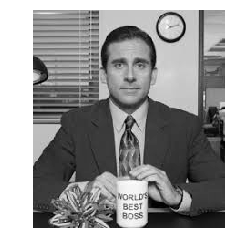

In [3]:
# Convert example image from BGR color coding to grayscale
test1 = cv2.imread('reference/4-Open_CV/michael_scott_example.jpeg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

# Display the grayscale picture
_ = plt.axis('off')
_ = plt.imshow(gray_img, cmap='gray')

So now that we have our Haar Classifier instantiated and our grayscale image prepared, we can run facial recognition on the picture. The ```detectMultiScale``` function allows us to do this. ```detectMultiScale``` uses the Haar classifier as an object to take in the image that we want to process and detect faces in the image. Once we run the ```detectMultiScale``` function on the grayscale image, it returns an (x, y, w, h) tuple that can be used to draw a rectangle around where the classifier detected a face.

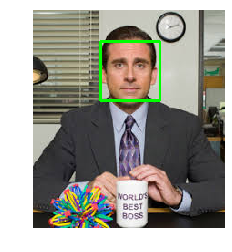

In [4]:
# Apply the Haar face cascade to find faces in the grayscale image
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# Draw a rectangle around where the face cascade found the face
test1_copy = test1.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(test1_copy, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
# Display the face detected picture
test1_copy = cv2.cvtColor(test1_copy, cv2.COLOR_BGR2RGB)
_ = plt.axis('off')
_ = plt.imshow(test1_copy)

The Haar classifier as defined in OpenCV is capable of detecting multiple faces in a single picture, as pictured below.

CPU times: user 123 ms, sys: 6.49 ms, total: 129 ms
Wall time: 61.6 ms


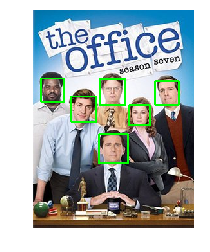

In [5]:
%%time

# Load another image for face detection
test2 = cv2.imread('reference/4-Open_CV/the_office_group_example.jpg')

# Converte the image from BGR to grayscale and apply the face cascade
gray_img = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# Draw a rectangle around where the face cascade found the faces
test2_copy = test2.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(test2_copy, (x,y), (x+w, y+h), (0, 255, 0), 2)

# Display the face detected picture
test2_copy = cv2.cvtColor(test2_copy, cv2.COLOR_BGR2RGB)
_ = plt.axis('off')
_ = plt.imshow(test2_copy)

<b>Yes, facial recognition is that easy to implement</b>. Reading an image, converting it to grayscale, instantiating the Haar Classifier, and using it on an image all takes less than 10 lines of code. It's really amazing that such powerful technology is so easy to use on projects just like this one!

---

## Local Binary Pattern Classifier

Generating Local Binary Pattern Histograms (LBPH) from an image is another means for facial detection. LBPH facial detection works like this. A grayscale image is divided into cells. Each cell is analyzed as a 3x3 pixel block. You take the center pixel of the 3x3 pixel block and look at all 8 pixels surrounding it. If the value for the surrounding pixel is greater than or equal to the center pixel, then that surrounding pixel is given the value 1; otherwise, the surrounding pixel is given the value 0.

<figure>
<img src="https://miro.medium.com/max/1334/1*J16_DKuSrnAH3WDdqwKeNA.png" alt="Example LBP Classifier" class="center">
<figcaption><center><b>Example LBPH Classifier</b></center></figcaption>
</figure> 

At the end of the process, the 8 pixels are read in clockwise orientation to form an 8 bit value from 0 to 255. The 3x3 pixel block is now assigned a single integer value. Taking 3x3 pixel blocks across the entire pixel cell yields a distribution of values ranging from 0 to 255. Each cell generates a histogram that are all combined together to form a feature vector that is used to extract features of a person's face from an image.

Features are extracted by means of edge detection. The LBPH is good at finding where edges are located in a picture since the transition of bits from 1 to 0 implies a dark to light transition in the picture. 

For example, the LBPH Classifier knows that the region of the eyes should be darker than the cheeks. It identifies this facial feature by looking at the histograms generated across all the cells in the picture and detecting edges that are consistent with this assumption.

As a final note on the LBPH Classifier, one of its main advantages is its ability to detect facial features independent of lighting conditions. In different lighting conditions, the relative difference in illumination from center pixels to neighboring pixels remain largely the same. So since the LBPH Classifier generates histograms based on relative illuminance from center to neighboring pixels, different lighting conditions for the same picture should identify the same subject. <b>Please excuse the creepiness of the example used in literature to illustrate this point</b>.

<figure>
<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/54_blog_image_12.jpg" alt="Example LBP Recognition" class="center">
<figcaption><center><b>Original Image (Top) vs. LBPH Detected Image (Bottom)</b></center></figcaption>
</figure> 

---

## Implementing the LBPH Classifier

One of the amazing things about OpenCV is how easy it is to switch from one classifier to another. To use the LBPH Classifier, we instantiate it the same way as we did the Haar Classifier. From the OpenCV master repository, we download "lbpcascade_frontalface.xml" and store it to our project files.

In [6]:
# Instantiate an LBP face cascade
lbp_face_cascade = cv2.CascadeClassifier("reference/4-Open_CV/lbpcascade_frontalface.xml")

Next, we convert the image to grayscale and run the ```detectMultiScale``` function on the classifier to scan our image for faces. After that, we print a rectangle that outlines where the LBPH Classifier found the faces and display the picture to check our results.

CPU times: user 58 ms, sys: 4.69 ms, total: 62.7 ms
Wall time: 58.5 ms


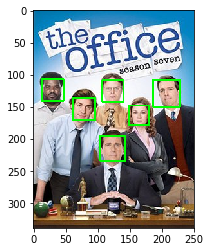

In [7]:
%%time

# Load the same group picture for face detection
test2 = cv2.imread('reference/4-Open_CV/the_office_group_example.jpg')

# Convert the image to grayscale and apply the face cascade
gray_img = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)
faces = lbp_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around detected faces
test2_copy = test2.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(test2_copy, (x,y), (x+w, y+h), (0, 255, 0), 2)

# Display the face detected picture
test2_copy = cv2.cvtColor(test2_copy, cv2.COLOR_BGR2RGB)
_ = plt.imshow(test2_copy)

So now that we've ran both classifiers on the image, you might have noticed that I ran a ```%%time``` command on the cell to check how long it took for the classifiers to run. With the scope of our project being 30 FPS videos that run at 1280x720 resolution for 22 minutes, there will be a total of 39,600 frames for each episode that we'll have to run the classifier on. As such, it'll be a good idea to choose the faster classifier to save time when running facial detection and recognition on our test videos.

Using the same picture from Season 7 of <i>The Office</i>, we found the that LBPH Classifier ran nearly twice as face as the Haar Classifier. In all the blog posts and literature that I've read about the subject, all sources claim that the LBPH Classifier is definitively faster than the Haar Classifier. We'll want to formally test these claims to see whether or not this statement is true just to be absolutely certain that this is the case. 

For the next blog post, we'll run a Null Hypothesis Test for the difference of two mean runtimes across both classifiers to determine if there's a measurable difference in classification time. If there is, we'll choose the classifier that has the lower measured runtime and use it for the remainder of the project.

---

## Running the Facial Classifier on Video

Before we end this blog post, I want to show you all how simple it is to implement the facial detection classifier on video. To do so, OpenCV includes video capture options that will allow us to run the facial recognition classifier on individual frames of a video. Just as a test, I took a video I found on YouTube of the famous scene where Kevin brings his famous homemade chili to the office. The first thing we'll do is demonstrate how the video capture works.

The first thing we need to do is load the video from the file onto our program using ```VideoCapture```. Once the file is loaded, we prepare an OpenCV ```VideoWriter``` that will save frames from the video to an output file.

Once the video is prepared for reading, we enter a while loop. The ```cap.read()``` function returns a boolean value ```ret``` and the contents from the frame in the loaded video as ```frame```. If ```ret``` is True, then a frame has been loaded into ```frame```. With the frame from the video loaded into ```frame```, we simply write out the frame into "office_test_1.mp4". If ```ret``` is False, then the reader has reached the end of the video and should be exited. The results of this simple write out can be seen below.

In [8]:
# Load the reference video into OpenCV
cap = cv2.VideoCapture('reference/4-Open_CV/office_test_video.mp4')

# Prepare the video writer
fourcc = cv2.VideoWriter_fourcc('a', 'v', 'c', '1')
fps = 30
frameSize = (1280, 720)
out = cv2.VideoWriter('reference/4-Open_CV/office_test_1.mp4', fourcc, fps=fps, frameSize=frameSize)

while(cap.isOpened()):
    
    # Read a single frame of the video
    ret, frame = cap.read()
    if ret == True:
        # Write it out to the output video writer
        out.write(frame)
    else:
        break

# Release the capture and video writer
cap.release()
out.release()
cv2.destroyAllWindows()

In [15]:
%%HTML
<video width="640" height="360" controls>
  <source src="reference/4-Open_CV/office_test_1.mp4" type="video/mp4">
</video>

Now, to run our facial classifier on the video, it's as simple as running the facial classifier on a single image. Just as in the previous example, we need to prepare the video and ```VideoWriter``` to be read and written to file. Next, we instantiate the LBP Classifier to be used on the frames read from the video.

In our loop, we check if ```ret``` is True. If it is, then we convert the frame into grayscale and run ```detectMultiScale``` on the frame. ```detectMultiScale``` returns a set of coordinates where the classifier identified faces in the frame. We use these coordinates to draw rectangles on the frame and write the edited frame out to the video file. We repeat this process until the face classifier runs through all the frames and writes it out to file. After all this is done, we exit the loop and release our capture and writer objects.

In [10]:
%%time

# Load the reference video into OpenCV
cap = cv2.VideoCapture('reference/4-Open_CV/office_test_video.mp4')


# Prepare the video writer
fourcc = cv2.VideoWriter_fourcc('a', 'v', 'c', '1')
fps = 30
frameSize = (1280, 720)
out = cv2.VideoWriter('reference/4-Open_CV/office_test_2.mp4',fourcc=fourcc, fps=fps, frameSize=frameSize)

# Instantiate the LBP Face Cascade
lbp_face_cascade = cv2.CascadeClassifier("reference/4-Open_CV/lbpcascade_frontalface.xml")

while(cap.isOpened()):
    
    # Read a single frame from the video
    ret, frame = cap.read()
    if ret == True:
        
        # Convert the frame to grayscale and apply the face cascade on the frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = lbp_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        
        # Draw the rectangle around the face
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
        # Write the face detected frame out using the video writer
        out.write(frame)
    else:
        break


# Release the capture and video writer
cap.release()
out.release()
cv2.destroyAllWindows()

CPU times: user 7min 26s, sys: 2.83 s, total: 7min 29s
Wall time: 2min 14s


In [16]:
%%HTML
<video width="640" height="360" controls>
  <source src="reference/4-Open_CV/office_test_2.mp4" type="video/mp4">
</video>

---

## A Brief Discussion on Hyperparameters

Now, you may have noticed that there are two arguments in ```detectMultiScale```.  The first is ```scaleFactor```. ```scaleFactor``` is a means for the classifier to detect faces closer to and further away from the camera using the same detection window. A ```scaleFactor``` of 1.1, for example, reduces the size of the detection window by 10% so smaller faces less prominent in the frame have a higher chance of being detected in frame.

```minNeighbors``` is the second argument in detectMultiScale. ```minNeighbors``` determines how many adjacent features have to be present in order to determine the presence of a face. If ```minNeighbors``` is too high, then the facial classifier will have a harder time detecting faces in the frame, but won't mistake many non-faces as faces. If ```minNeighbors``` is too low, then the opposite is true.

To perform a side-by-side comparison of how these arguments known as <b><i>hyperparameters</i></b> affect facial detection, let's adjust the ```minNeighbors``` value from 5 to 7.

In [12]:
%%time

# Load the reference video into OpenCV
cap = cv2.VideoCapture('reference/4-Open_CV/office_test_video.mp4')

# Instantiate the LBP Face Cascade
lbp_face_cascade = cv2.CascadeClassifier("reference/4-Open_CV/lbpcascade_frontalface.xml")

# Prepare the video writer
fourcc = cv2.VideoWriter_fourcc('a', 'v', 'c', '1')
fps = 30
frameSize = (1280, 720)
out = cv2.VideoWriter('reference/4-Open_CV/office_test_3.mp4',fourcc=fourcc, fps=fps, frameSize=frameSize)

while(cap.isOpened()):
    
    # Read a single frame from the video
    ret, frame = cap.read()
    if ret == True:
        
        # Apply the face cascade on the frame with minNeighbors=7
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = lbp_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=7)
        
        # Draw the rectangle around the face
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
        # Write the face detected frame out using the video writer
        out.write(frame)
    else:
        break


# Release the capture and video writer
cap.release()
out.release()
cv2.destroyAllWindows()

CPU times: user 7min 31s, sys: 4.41 s, total: 7min 35s
Wall time: 2min 30s


And now that we've generated the video into "office_test_3.mp4", let's edit the video and create a side-by-side comparison. <b> minNeighbors = 5 on the left and minNeighbors = 7 on the right </b>.

In [13]:
%%time

# Convert the face detected videos into MoviePy VideoFileClip objects
clip1 = VideoFileClip('reference/4-Open_CV/office_test_2.mp4').margin(10)
clip2 = VideoFileClip('reference/4-Open_CV/office_test_3.mp4').margin(10)

# Edit the videos side-by-side
final_clip = clips_array([[clip1, clip2]])

# Save the edited video
final_clip.resize(width=640).write_videofile('reference/4-Open_CV/office_test_comparison.mp4');

t:   0%|          | 2/1380 [00:00<01:13, 18.85it/s, now=None]

Moviepy - Building video reference/4-Open_CV/office_test_comparison.mp4.
Moviepy - Writing video reference/4-Open_CV/office_test_comparison.mp4



Moviepy - Done !
Moviepy - video ready reference/4-Open_CV/office_test_comparison.mp4
CPU times: user 2min 59s, sys: 21.8 s, total: 3min 21s
Wall time: 2min 4s


In [17]:
%%HTML
<video width="640" height="360" controls>
  <source src="reference/4-Open_CV/office_test_comparison.mp4" type="video/mp4">
</video>

Here, you can see how ```minNeighbors``` affects our facial classifier. At the beginning of the video where Kevin is carrying the chili, you can see that the ```minNeighbors = 5``` classifier was detecting the region near his pants as a face. During the interview, you can see that the classifier was spazzing out more and detecting his ear and the bushes as facial features. 

Now, on the contrary, with ```minNeighbors=7```, our facial classifier had a more difficult time keeping track of Kevin's face during the interview. But besides that, during the climax of the scene where Kevin drops the chili, both classifiers performed similarly.

So this is something that we'll have to address in the future for our project; defining the values for ```scaleFactor``` and ```minNeighbors``` that yield best performance. We'll do this by running our classifier on a bevy of images from <i>The Office</i> and creating a confusion matrix by hand to gauge how the model performed under particular conditions. But that's for a later time.

A quick aside before I end things, but we are using <i><b>frontal face</b></i> classifiers. This means that the classifier works best when the people in the frame are facing front and towards the camera. This is the best facial classifier we have in OpenCV for this project, so it's the one we're going to use. We should fully expect the classifier to struggle when characters aren't facing the camera in frame, but thankfully <i>The Office</i> is shot in a way that reduces this issue.

Anyways, thanks for reading. On the next blog post, we'll figure out which classifier to use via mean comparison through a Null Hypothesis Test. Until then, cheers!